# Примеры SQL запросов

## ER-диаграмма 

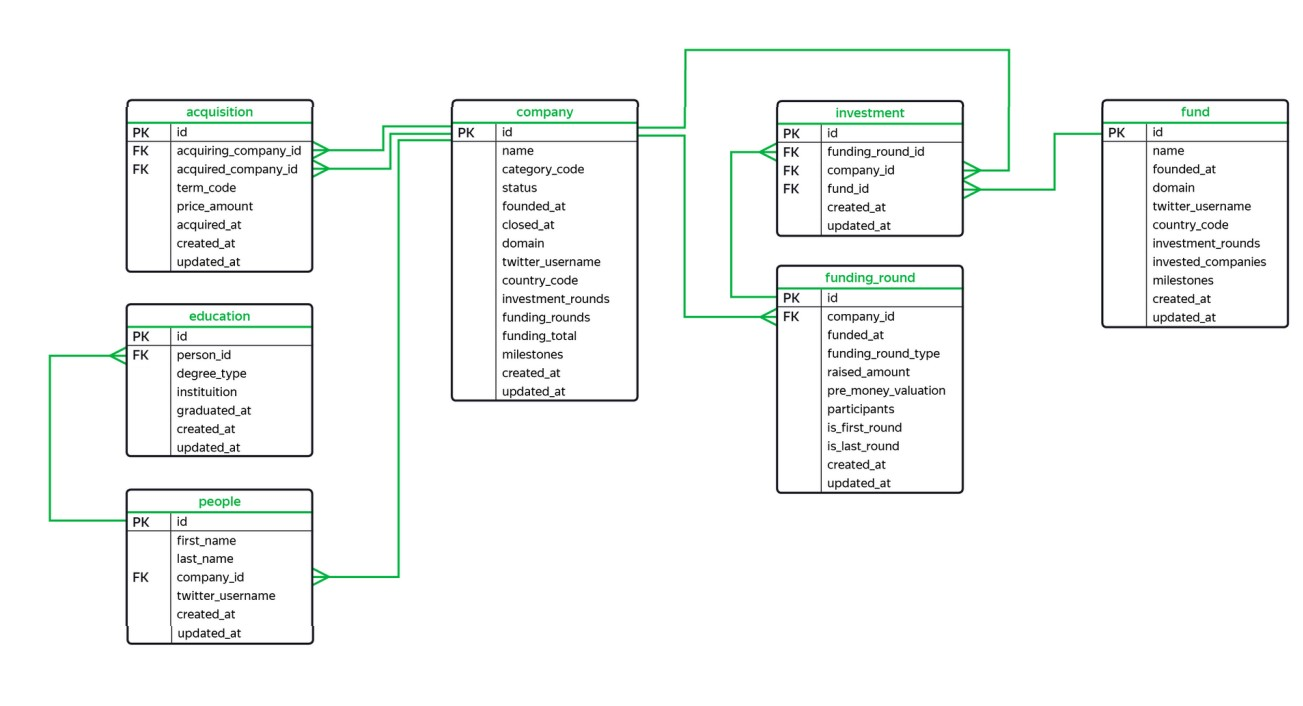

### Задание 1 

Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH y_11 AS 
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2011
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2011'),
    
y_12 AS
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2012
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2012'),
    
y_13 AS
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2013
    FROM company
    WHERE EXTRACT(YEAR FROM founded_at::DATE) IN(2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2013')

SELECT y_11.country, y_2011, y_2012, y_2013
FROM y_11
JOIN y_12 ON y_11.country = y_12.country
JOIN y_13 ON y_12.country = y_13.country
ORDER BY y_2011 DESC;

### Задание 2

Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
 - номер месяца, в котором проходили раунды;
 - количество уникальных названий фондов из США, которые инвестировали в этом месяце;
 - количество компаний, купленных за этот месяц;
 - общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH fundings AS
    (SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE)) AS funding_month,
            COUNT(DISTINCT f.id) AS us_funds
    FROM fund AS f
    LEFT JOIN investment AS i ON f.id = i.fund_id
    LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
    WHERE f.country_code = 'USA'
    AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
    GROUP BY funding_month),
acquisitions AS
    (SELECT EXTRACT(MONTH FROM CAST(acquired_at AS DATE)) AS funding_month,
            COUNT(acquired_company_id) AS bought_co,
    SUM(price_amount) AS sum_total
    FROM acquisition
    WHERE EXTRACT(YEAR FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013
    GROUP BY funding_month)

SELECT fnd.funding_month, fnd.us_funds, acq.bought_co, acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

### Задание 3 

Составьте таблицу из полей:
 - name_of_fund — название фонда;
 - name_of_company — название компании;
 - amount — сумма инвестиций, которую привлекла компания в раунде.
 
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN 
    (SELECT*
    FROM funding_round
    WHERE funded_at BETWEEN '2012-01-01' AND '2013-12-31')
AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

### Задание 4 

Составьте таблицу из полей:
 - name_of_fund — название фонда;
 - name_of_company — название компании;
 - amount — сумма инвестиций, которую привлекла компания в раунде.
 
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN 
    (SELECT*
    FROM funding_round
    WHERE funded_at BETWEEN '2012-01-01' AND '2013-12-31')
AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

### Задание 5 

Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at,
       MIN(raised_amount) as min,
       MAX(raised_amount) as max
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) != 0
   AND MIN(raised_amount) != MAX(raised_amount)